In [24]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
num=22
denum=20
habnum=30
Ms=(np.arange(num)/(num-2))+0.05#0.05~1.1
#print(Ms)
fracs=np.array([75,77,53,43,40,35,34,34,34,33,32,32,31,31,30,30,29,28,27,26,26,25])/100
#print(fracs.shape)

depes=np.arange(denum)/20.#0.05 0.1 0.15 0.2
habas=np.arange(habnum)/10. #0.1 0.3 0.5
dn=np.arange(denum)
hn=np.arange(habnum)
import time
start = time.time() 
#fdata=np.load('41fulldata1000.npy')
#fdata=np.load('bayo6life1000.npy')#(array([2]), array([14]))0.06356000000000002
#fdata=np.load('bayo6life10000.npy')#(array([2]), array([12]))0.06156591999999999
#fdata=np.load('bayo6life100000.npy')#(array([2]), array([10]))0.061047459199999994
#fdata=np.load('bayo9life100000.npy')#(array([2]), array([10]))0.061047459199999994v

#dlifes=(np.arange(20)*10)
dnums=20
dlifes=(np.arange(dnums)*10)
#print(dlifes)
#for starnum in [220000,100000]:
#for dlife in dlifes:
#fanas=np.zeros(dnums)
for dnum in range(dnums):
    dlife=dlifes[dnum]
    #fdata=np.load('bayo12'+str(dlife)+'life.npy')#(array([2]), array([10]))0.0610474591999999
    #fdata=np.load('bayo13lifes'+str(dlife)+'life1000.npy')#(array([2]), array([10]))0.0610474591999999
    
    fdata=np.load('bayo14lifes'+str(dlife)+'life1000.npy')#(array([2]), array([10]))0.0610474591999999
    #print('bayo13lifes'+str(dlife)+'life1000.npy')
    #print(fdata.shape)
    fds=fdata.shape
    fana=np.zeros([fds[0],fds[1],2])
    if dnum==0:
        fanas=np.zeros([dnums,fds[0],fds[1],2])
    #print(fana.shape)

    for i in range(fds[0]):
        #print(i,"depe")
        for j in range(fds[1]):
            #print(j,"haba")
            mini=1000
            for k in range(fds[3]):
                #print(k)
                #if (np.sum((np.square(fdata[i,j,:,k]-fracs))))<mini:#chack all point
                    #mini=(np.sum((np.square(fdata[i,j,:,k]-fracs))))
                if (np.sum((np.square(fdata[i,j,5:,k]-fracs[5:]))))<mini: #check last 5> point
                    mini=(np.sum((np.square(fdata[i,j,5:,k]-fracs[5:]))))
                    #print(mini)
                    fana[i,j,0]=mini#chai square 
                    fana[i,j,1]=k#timing
            #print(fana[i,j,0],fana[i,j,1])
    end = time.time()  # 現在時刻（処理完了後）を取得
    time_diff = end - start  # 処理完了後の時刻から処理開始前の時刻を減算する
    #print(time_diff)  # 処理にかかった時間データを使用
    fanas[dnum,:,:,:]=fana
    #print(fana[:,:,0].min(),"minimu")
    #print(np.where(fana[:,:,0] == fana[:,:,0].min()))
    #print(fana[1,1,1])
    print(dnum)
#plt.cla
#plt.plot(Ms,fdata[1, 1, :, 216])
#plt.scatter(Ms,fracs)
#plt.savefig("Msaiteki.png")
#plt.show()
np.save('bayo14all1000.npy', fanas)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


(20, 20, 30, 2)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


<IPython.core.display.Javascript object>


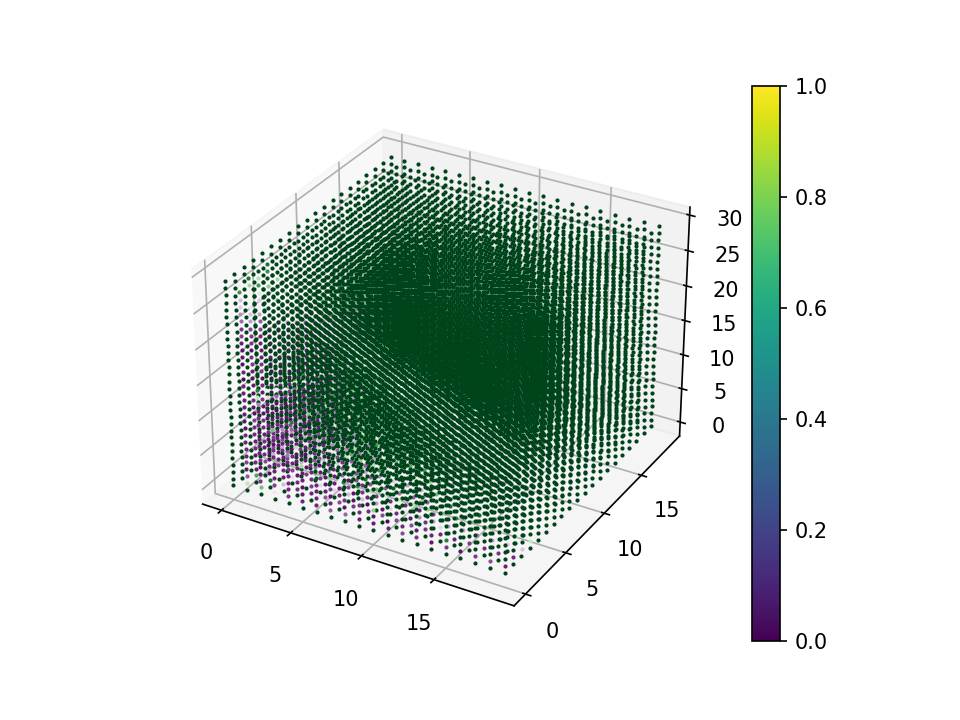

/tmp/ipykernel_2971/2309286699.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(x[i], y[j], z[k],c=cm(fanas[i,j,k,0]), s=1)


() (20,) (30,) (20, 20, 30)


In [42]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib import colors
#cm = plt.get_cmap("Blues")
cm = plt.get_cmap("PRGn")
fanas=np.load('bayo14all1000.npy')
fdss=fanas.shape
print(fanas.shape)
x = np.arange(0, fdss[0], 1)
y = np.arange(0, fdss[1], 1)
z = np.arange(0, fdss[2], 1)
print(x)
# different from yours, see below
#x = y = z = np.linspace(-2, 2, 41)
X, Y, Z = np.meshgrid(x, y, z)
#values = 2*X*X - Y*Y + 1/(Z*Z+1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(x[0].shape,y.shape,z.shape,fanas[:,:,:,0].shape)
#scatter = ax.scatter(z, y, x,c=cm(fanas[:,:,:,0]), cmap='PRGn')
#scatter = ax.scatter(x[0], y[0], z[0],c=cm(fanas[0,0,0,0]), cmap='PRGn')
for i in range(fdss[0]):
    for j in range(fdss[1]):
        for k in range(fdss[2]):
            scatter = ax.scatter(x[i], y[j], z[k],c=cm(fanas[i,j,k,0]), s=1)
#scatter = ax.scatter(X[0], Y[0], Z[0],color=cm(fanas[0,0,0,0]), cmap='PRGn')
fig.colorbar(scatter, ax=ax)

plt.show()

In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib import colors
#cm = plt.get_cmap("Blues")
cm = plt.get_cmap("PRGn")
fanas=np.load('bayo14all1000.npy')
fdss=fanas.shape
print(fanas.shape)
x = np.arange(0, fdss[0], 1)
y = np.arange(0, fdss[1], 1)
z = np.arange(0, fdss[2], 1)
print(x)
# different from yours, see below
#x = y = z = np.linspace(-2, 2, 41)
X, Y, Z = np.meshgrid(x, y, z)
#values = 2*X*X - Y*Y + 1/(Z*Z+1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(x[0].shape,y.shape,z.shape,fanas[:,:,:,0].shape)
#scatter = ax.scatter(z, y, x,c=cm(fanas[:,:,:,0]), cmap='PRGn')
#scatter = ax.scatter(x[0], y[0], z[0],c=cm(fanas[0,0,0,0]), cmap='PRGn')
for i in range(fdss[0]):
    for j in range(fdss[1]):
        for k in range(fdss[2]):
            scatter = ax.scatter(x[i], y[j], z[k],c=cm(fanas[i,j,k,0]), s=2)
#scatter = ax.scatter(X[0], Y[0], Z[0],color=cm(fanas[0,0,0,0]), cmap='PRGn')
fig.colorbar(scatter, ax=ax)
ax.view_init(elev=30, azim=140)
plt.show()

(20, 20, 30, 2)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


<IPython.core.display.Javascript object>

/tmp/ipykernel_2971/3698192529.py:31: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter = ax.scatter(x[i], y[j], z[k],c=cm(fanas[i,j,k,0]), s=2)


() (20,) (30,) (20, 20, 30)


<IPython.core.display.Javascript object>


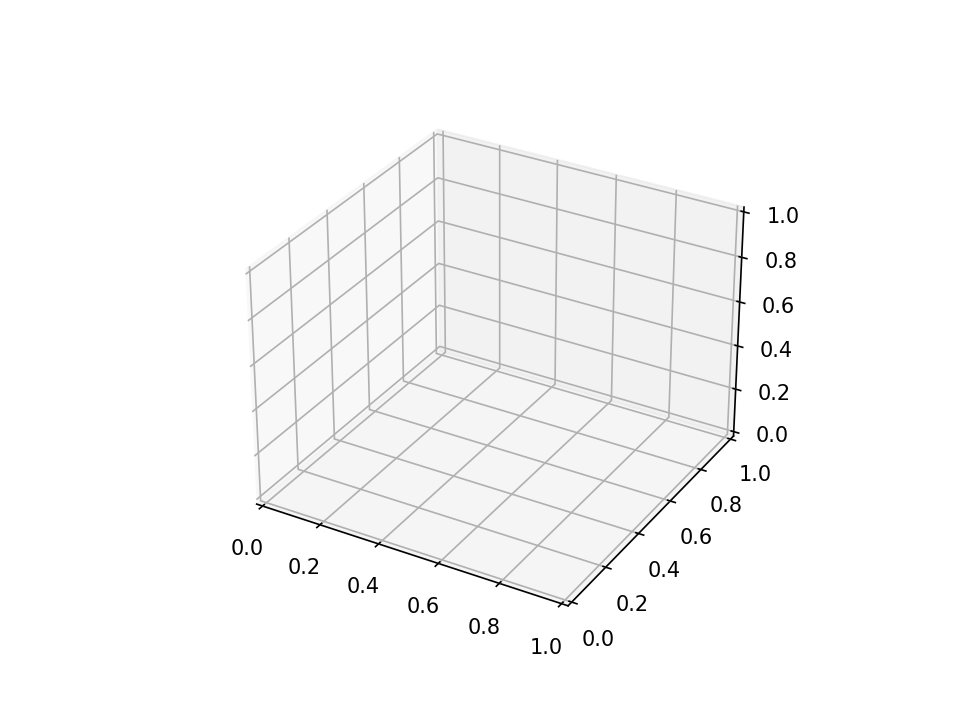

NameError: name 'C' is not defined

In [12]:
# different from yours, see below
x = y = z = np.linspace(-2, 2, 41)
X, Y, Z = np.meshgrid(x, y, z)
values = 2*X*X - Y*Y + 1/(Z*Z+1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X, Y, Z, c=C, cmap='PRGn')
fig.colorbar(scatter, ax=ax)

plt.show()

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1 ]
(22,)
(20, 30, 22, 3000)
(20, 30, 2)
20.25475525856018
(20, 30)


<IPython.core.display.Javascript object>


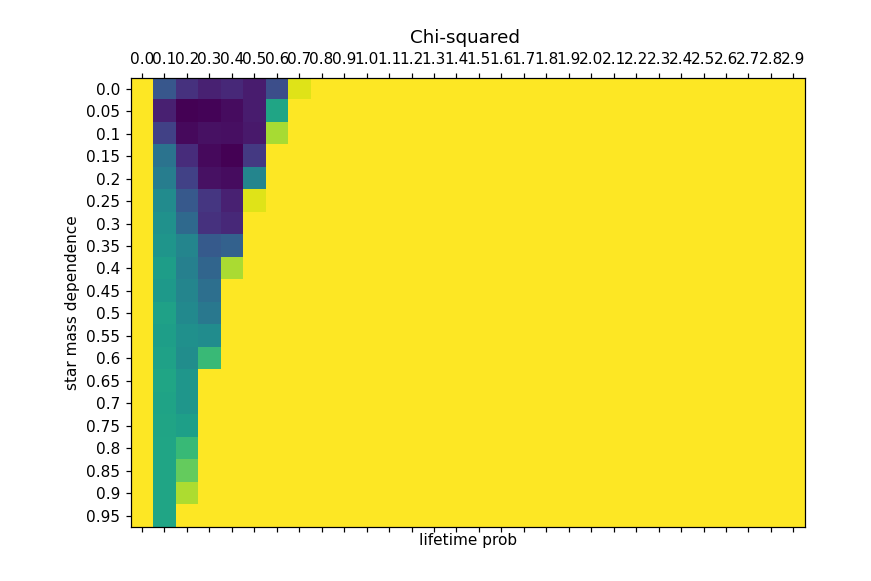

"plt.colorbar(plt.matshow(fana[0:6,:,0]))\nplt.matshow(fana[:,:,1])\nplt.yticks(dn, depes)\nplt.xticks(hn, habas)\nplt.ylabel('star mass dependence')\nplt.xlabel('lifetime prob')\nplt.title('timing')\nplt.plot()"

In [9]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
num=22
denum=20
habnum=30
Ms=(np.arange(num)/(num-2))+0.05#0.05~1.1
print(Ms)
fracs=np.array([75,77,53,43,40,35,34,34,34,33,32,32,31,31,30,30,29,28,27,26,26,25])/100
print(fracs.shape)

depes=np.arange(denum)/20.#0.05 0.1 0.15 0.2
habas=np.arange(habnum)/10. #0.1 0.3 0.5
dn=np.arange(denum)
hn=np.arange(habnum)
import time
start = time.time() 
#fdata=np.load('41fulldata1000.npy')
#fdata=np.load('bayo6life1000.npy')
#fdata=np.load('bayo9life100000.npy')#(array([6]), array([8]))

#fdata=np.load('bayo12200life500.npy')#(array([2]), array([10]))0.061047459199999994
fdata=np.load('bayo1250life500.npy')#(array([2]), array([10]))0.061047459199999994
#fdata=np.load('bayo6life10000.npy')
#fdata=np.load('bayo6life100000.npy')
print(fdata.shape)
fds=fdata.shape
fana=np.zeros([fds[0],fds[1],2])
print(fana.shape)

for i in range(fds[0]):
    #print(i,"depe")
    for j in range(fds[1]):
        #print(j,"haba")
        mini=1000
        for k in range(fds[3]):
            #print(k)
            if (np.sum((np.square(fdata[i,j,:,k]-fracs))))<mini:
                mini=(np.sum((np.square(fdata[i,j,:,k]-fracs))))
                fana[i,j,0]=mini
                fana[i,j,1]=k
        #print(fana[i,j,0],fana[i,j,1])
end = time.time()  # 現在時刻（処理完了後）を取得
time_diff = end - start  # 処理完了後の時刻から処理開始前の時刻を減算する
print(time_diff)  # 処理にかかった時間データを使用

print(fana[:,:,0].shape)

'''plt.matshow(fana[0:6,3:13,0])
plt.yticks(dn[0:6], depes[0:6])
plt.xticks(hn[0:10], habas[3:13])'''
plt.matshow(fana[:,:,0])
plt.yticks(dn[:], depes[:])
plt.xticks(hn[:], habas[:])
plt.ylabel('star mass dependence')
plt.xlabel('lifetime prob')
plt.title('Chi-squared ')
plt.plot()
'''plt.colorbar(plt.matshow(fana[0:6,:,0]))
plt.matshow(fana[:,:,1])
plt.yticks(dn, depes)
plt.xticks(hn, habas)
plt.ylabel('star mass dependence')
plt.xlabel('lifetime prob')
plt.title('timing')
plt.plot()'''

[0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7
 0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1 ]
(22,)
(20, 30, 22, 300)
(20, 30, 2)
3.4306187629699707
(20, 30)


<IPython.core.display.Javascript object>


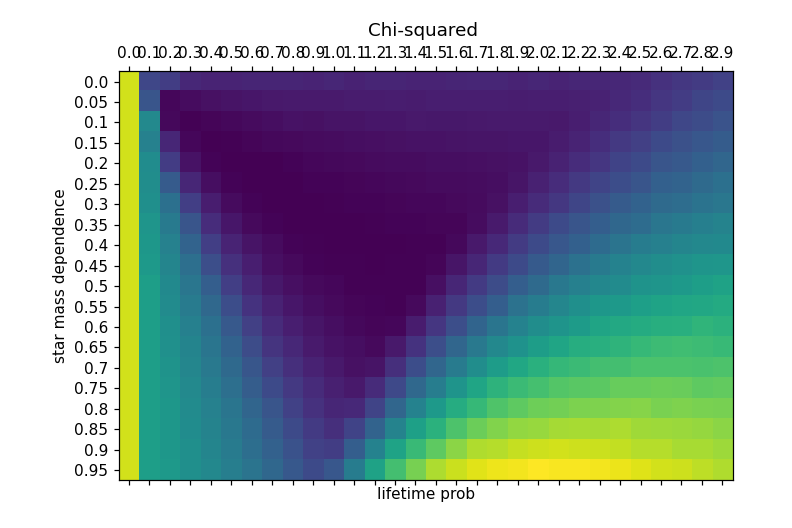

(20, 30, 22, 300)
(20, 30, 2)
6.000369310379028
(20, 30)


<IPython.core.display.Javascript object>


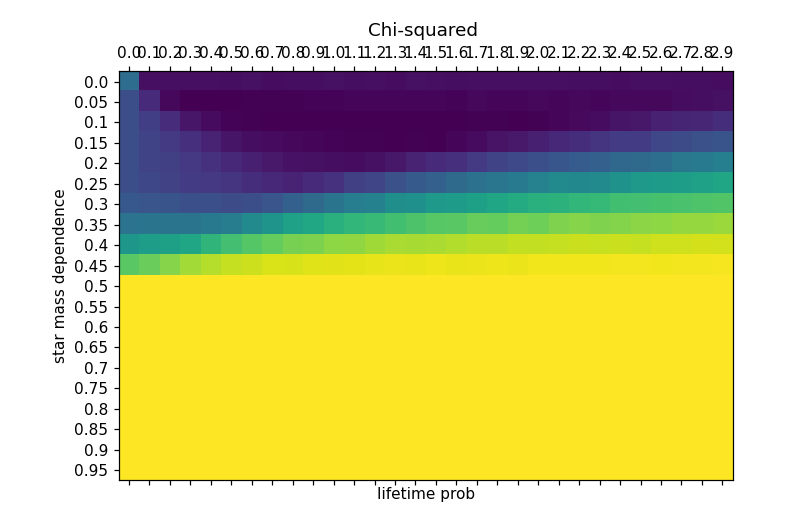

In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
num=22
denum=20
habnum=30
Ms=(np.arange(num)/(num-2))+0.05#0.05~1.1
print(Ms)
fracs=np.array([75,77,53,43,40,35,34,34,34,33,32,32,31,31,30,30,29,28,27,26,26,25])/100
print(fracs.shape)

depes=np.arange(denum)/20.#0.05 0.1 0.15 0.2
habas=np.arange(habnum)/10. #0.1 0.3 0.5
dn=np.arange(denum)
hn=np.arange(habnum)
import time
start = time.time() 
#fdata=np.load('41fulldata1000.npy')
#fdata=np.load('bayo6life1000.npy')
#fdata=np.load('bayo9life100000.npy')#(array([6]), array([8]))
#fdata=np.load('bayo6life10000.npy')
#fdata=np.load('bayo6life100000.npy')
for fd in ['bayo9life100000.npy','bayo6life10000.npy']:
for fd in ['bayo9life100000.npy','bayo6life10000.npy']:
    fdata=np.load(fd)
    print(fdata.shape)
    fds=fdata.shape
    fana=np.zeros([fds[0],fds[1],2])
    print(fana.shape)

    for i in range(fds[0]):
        #print(i,"depe")
        for j in range(fds[1]):
            #print(j,"haba")
            mini=1000
            for k in range(fds[3]):
                #print(k)
                if (np.sum((np.square(fdata[i,j,:,k]-fracs))))<mini:
                    mini=(np.sum((np.square(fdata[i,j,:,k]-fracs))))
                    fana[i,j,0]=mini
                    fana[i,j,1]=k
            #print(fana[i,j,0],fana[i,j,1])
    end = time.time()  # 現在時刻（処理完了後）を取得
    time_diff = end - start  # 処理完了後の時刻から処理開始前の時刻を減算する
    print(time_diff)  # 処理にかかった時間データを使用

    print(fana[:,:,0].shape)

    '''plt.matshow(fana[0:6,3:13,0])
    plt.yticks(dn[0:6], depes[0:6])
    plt.xticks(hn[0:10], habas[3:13])'''
    plt.matshow(fana[:,:,0])
    plt.yticks(dn[:], depes[:])
    plt.xticks(hn[:], habas[:])
    plt.ylabel('star mass dependence')
    plt.xlabel('lifetime prob')
    plt.title('Chi-squared ')
    plt.plot()
    '''plt.colorbar(plt.matshow(fana[0:6,:,0]))
    plt.matshow(fana[:,:,1])
    plt.yticks(dn, depes)
    plt.xticks(hn, habas)
    plt.ylabel('star mass dependence')
    plt.xlabel('lifetime prob')
    plt.title('timing')
    plt.plot()'''